# Analýza dát

Dáta sú uložené v súboroch TSV (Tab Sepparated Values), čo je v podstate iba modifikácia súboru CSV (Comma Separated Values). Dáta obsahujú testovaciu a trénovaciu časť. Trénovací dataset obsahuje 27 atribútov, kým testovací 26. Ide o klasifikačný problém a 27-mi atribút v trénovacom datasete ozačuje evergreen stránky.  
Nasledujú samply oboch datasetoch:

In [34]:
import pandas
import matplotlib.pyplot as plt

pandas.set_option('display.max_columns', None)
TRAIN_DF = pandas.read_csv('train.tsv', sep='\t')
TRAIN_DF.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [19]:
TEST_DF = pandas.read_csv('test.tsv', sep='\t')
TEST_DF.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,...,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,...,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,...,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,...,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,...,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


In [45]:
TRAIN_DF.loc[TRAIN_DF['label'] == 1]['label'].count() / TRAIN_DF.loc[TRAIN_DF['label'] == 0]['label'].count()

1.0547374270630732

## Analýza atribútov trénovacieho datasetu
### Url
*Typ atribútu:* nominálny  
Atribút predstavuje URL odkaz na webovú stránku.

In [3]:
TRAIN_DF['url'].head()

0    http://www.bloomberg.com/news/2010-12-23/ibm-p...
1    http://www.popsci.com/technology/article/2012-...
2    http://www.menshealth.com/health/flu-fighting-...
3    http://www.dumblittleman.com/2007/12/10-foolpr...
4    http://bleacherreport.com/articles/1205138-the...
Name: url, dtype: object

### Urlid
*Typ atribútu:* numerický, celočíselný, intervalový  
Unikátne identifikátory pre každú webovú stránku. Hodnoty sú z intervalu <1,10566>.

In [21]:
TRAIN_DF['urlid'].head()
TRAIN_DF['urlid'].max()
TRAIN_DF['urlid'].min()

1

### Boilerplate
*Typ atribútu:* JSON

In [22]:
TRAIN_DF['boilerplate'][0].split('",')

['{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries',
 '"body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San 

#### Title
*Typ atribútu:* nominálny  
Atribút predstavuje titul webovej stránky. Ide o atribút variabilnej dĺžky textu.

#### Body
*Typ atribútu:* nominálny  
Atribút obsahuje text ľubovoľnej dĺžky. Ide o textový obsah webovej stránky alebo jej časť.

#### Url
*Typ atribútu:* nominálny  
Atribút predstavuje URL identifikátor webovej stránky. Tento atribút je totožný s atribútom URL s rozdielom, že separátory URL (napr. bodky a lomítka) sú odstránené. Informácia v atribúte je redundantná a môže byť odstránená bez straty informácií celkového datasetu.

### Alchemy Category
*Typ atribútu:* nominálny, kategorický  
Atribút predstavuje kategóriu článku na webovej stránke. Hodnoty boli získané pomocou AlchemiAPI nástroja na analýzu textu, z ktorého boli získané kategórie (napr. business, sports…). Atribút obsahuje chýbajúce hodnoty v tvare otáznikov (?).

In [25]:
print(TRAIN_DF['alchemy_category'].head(5))
description = TRAIN_DF['alchemy_category'].describe()
print('\nStats:\n' + str(description))
print('\nMissing value percentage: ' + str(description['freq']/description['count'] * 100))

0      business
1    recreation
2        health
3        health
4        sports
Name: alchemy_category, dtype: object

Stats:
count     7395
unique      14
top          ?
freq      2342
Name: alchemy_category, dtype: object

Missing value percentage: 31.6700473293


### Alchemy Category Score
*Typ atribútu:* numerický, decimálny, intervalový  
Atribút predstavuje skóre získané AlchemyAPI na analýzu textu. Hodnoty sú z intervalu <0,1>.  
Rovnako ako 3.4 aj tuná je 31.67% chýbajúcich hodnôt.

In [26]:
print(TRAIN_DF['alchemy_category_score'].head(5))
print('\nStats:\n' + str(pandas.to_numeric(
    TRAIN_DF['alchemy_category_score'], errors='coerce'
    ).describe()))
description = TRAIN_DF['alchemy_category_score'].describe()
print('\nTop simbol\n' + str(description['top']))
print('\nMissing value percentage\n' + str(description['freq']/description['count'] * 100))

0    0.789131
1    0.574147
2    0.996526
3    0.801248
4    0.719157
Name: alchemy_category_score, dtype: object

Stats:
count    5053.000000
mean        0.603334
std         0.212864
min         0.070833
25%         0.452424
50%         0.625616
75%         0.780851
max         0.999426
Name: alchemy_category_score, dtype: float64

Top simbol
?

Missing value percentage
31.6700473293


### Avglinksize
*Typ atribútu:* numerický, decimálny  
Atribút predstavuje priemerný počet slov v odkazoch nachádzajúcich sa na stránke.

0    2.055556
1    3.677966
2    2.382883
3    1.543103
4    2.676471
Name: avglinksize, dtype: float64

Stats:
count    7395.000000
mean        2.761823
std         8.619793
min         0.000000
25%         1.602062
50%         2.088235
75%         2.627451
max       363.000000
Name: avglinksize, dtype: float64


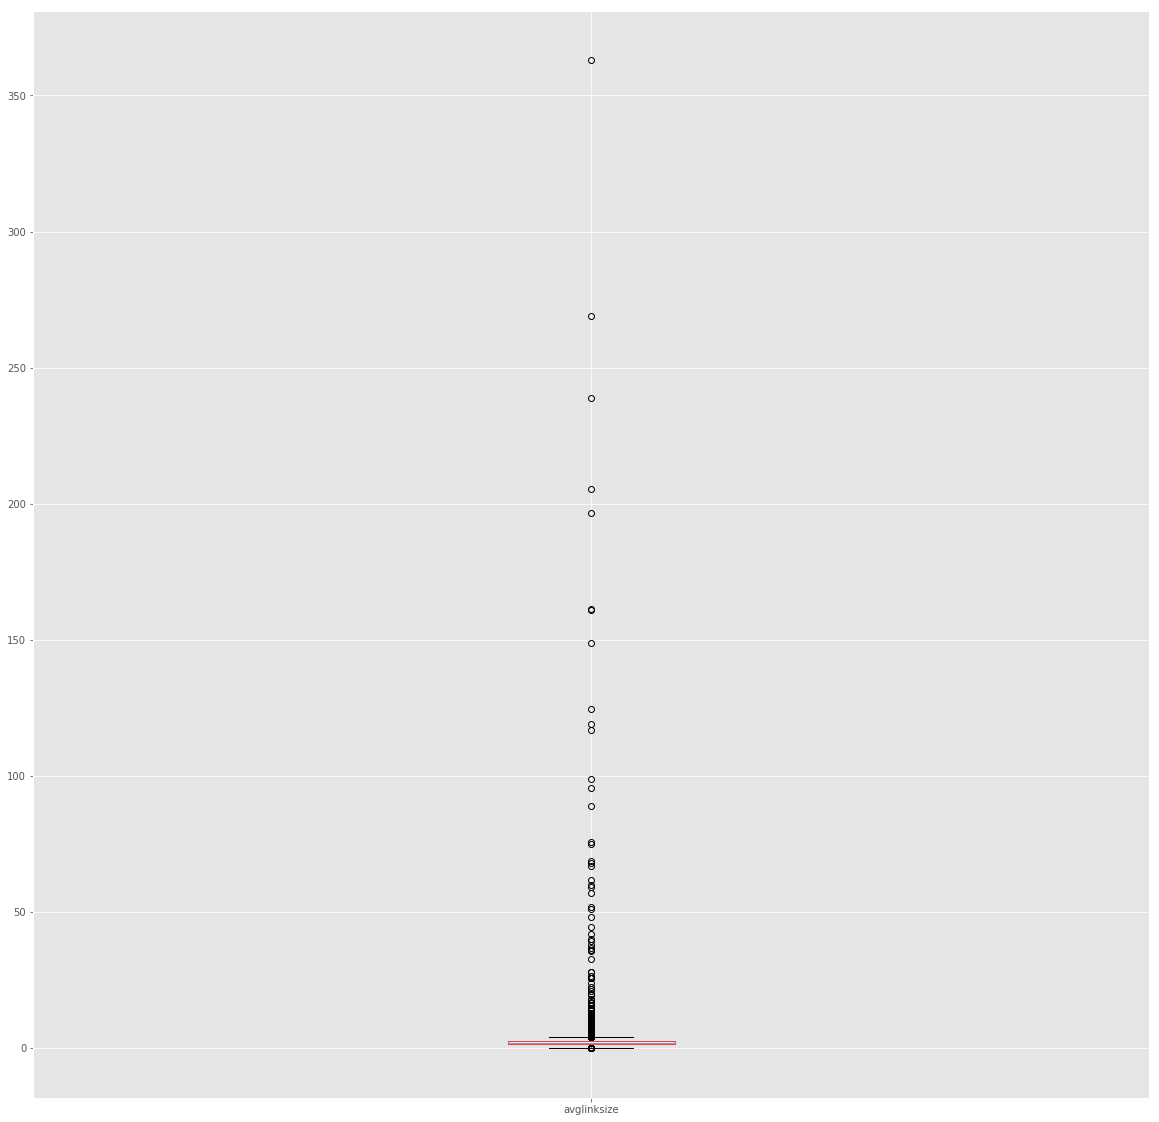

In [61]:
print(TRAIN_DF['avglinksize'].head(5))
print('\nStats:\n' + str(pandas.to_numeric(TRAIN_DF['avglinksize'], errors='coerce').describe()))
TRAIN_DF['avglinksize'].plot.box(figsize=(20,20))

### Pomerové hodnoty
*Typ atribútov:* numerické, decimálne, intervalové  
Táto skupina atribútov vyjadruje rôzne pomery.

#### Compression Ratio
Vyjadruje pomer kompresie dosiahnutej na danej stránke.

#### Frame Tag Ratio
Vyjadruje pomer &lt;iframe&gt; elementov (vnorená stránka) voči celkovému počtu elementov na stránke.

#### HTML Ratio
Pomer html elementov voči čistému textu na stránky.

#### Image Ratio
Pomer obrázkov na stránke (&lt;img&gt; element) voči čistému textu.  
Minimálna hodnota sa rovná -1, čo naznačuje chybu v dátach.

#### Parametrized Link Ratio
Pomer parametrizovaných odkazov voči normálnym. Parametrizovaný odkaz obsahuje parametre (HTTP GET) alebo onClick() event listener.

#### Spelling Errors Ratio
Pomer slov nenájdených vo wiki – pokladajú sa za chybové.

#### Common Link Ratio N
Vyjadruje pomer odkazov, ktoré majú aspoň N slov spoločných s ostatnými odkazmi voči celkovému počtu odkazov.


       commonlinkratio_1  commonlinkratio_2  commonlinkratio_3  \
count        7395.000000        7395.000000        7395.000000   
mean            0.468230           0.214080           0.092062   
std             0.203133           0.146743           0.095978   
min             0.000000           0.000000           0.000000   
25%             0.340370           0.105263           0.022222   
50%             0.481481           0.202454           0.068627   
75%             0.616604           0.300000           0.133333   
max             1.000000           1.000000           0.980392   

       commonlinkratio_4  
count        7395.000000  
mean            0.049262  
std             0.072629  
min             0.000000  
25%             0.000000  
50%             0.022222  
75%             0.065065  
max             0.980392  


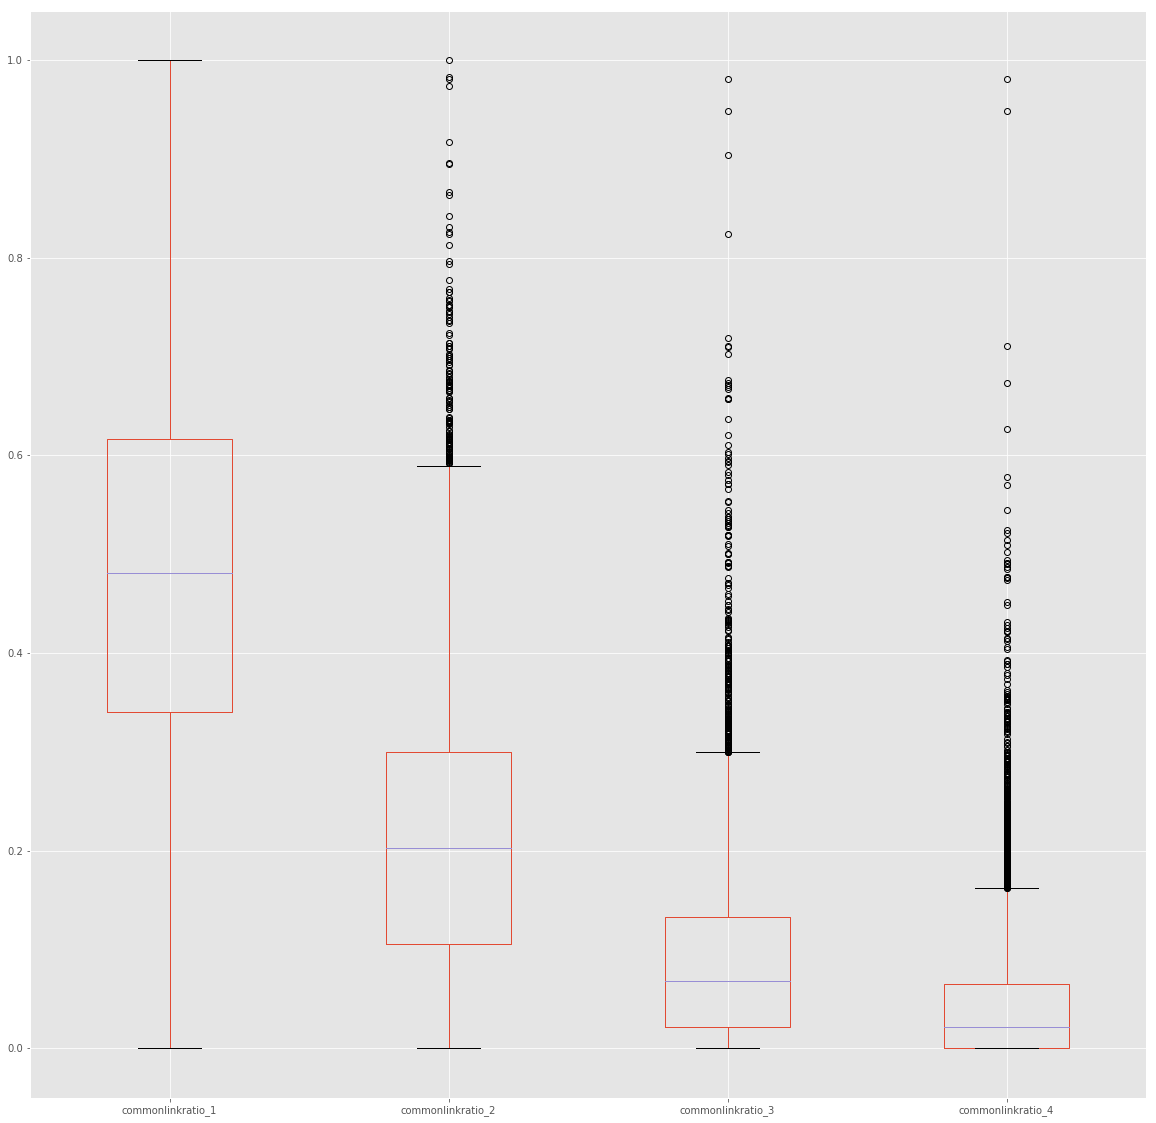

In [13]:
print(TRAIN_DF[[    
        'commonlinkratio_1',
        'commonlinkratio_2',
        'commonlinkratio_3',
        'commonlinkratio_4'
        ]].describe())

plt.figure()
TRAIN_DF[[
    'commonlinkratio_1',
    'commonlinkratio_2',
    'commonlinkratio_3',
    'commonlinkratio_4'
]].plot.box(figsize=(20, 20))

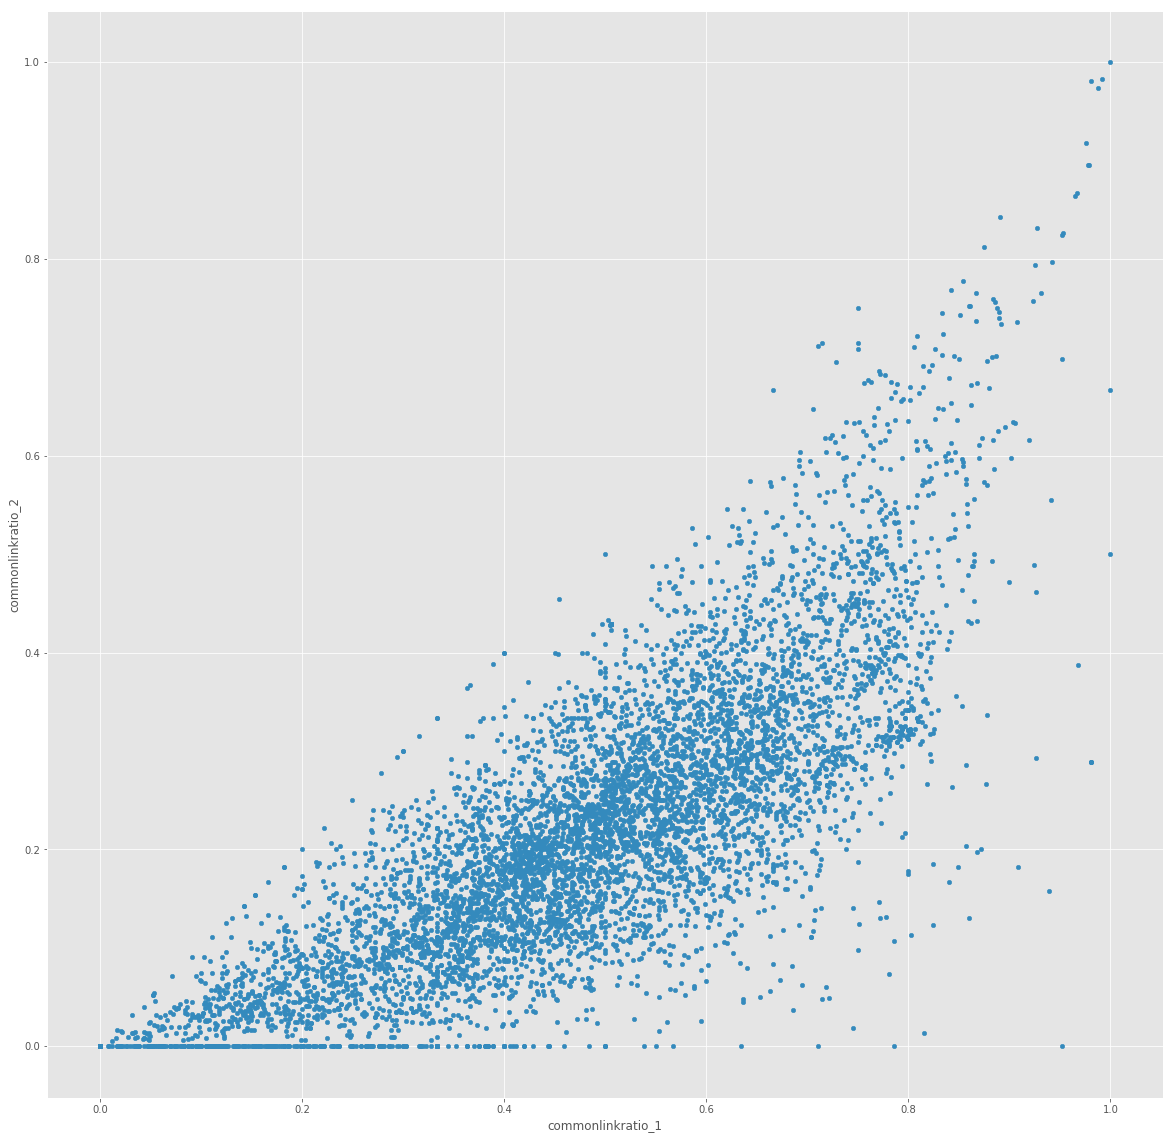

In [87]:
plt.figure()
TRAIN_DF[[
    'commonlinkratio_1',
    'commonlinkratio_2'
]].plot.scatter(x='commonlinkratio_1', y='commonlinkratio_2', figsize=(20, 20))



### compression_ratio ###
0    0.443783
1    0.468649
2    0.525448
3    0.480725
4    0.446143
Name: compression_ratio, dtype: float64

Stats:
count    7395.000000
mean        2.255103
std         5.704313
min         0.000000
25%         0.442616
50%         0.483680
75%         0.578227
max        21.000000
Name: compression_ratio, dtype: float64


### embed_ratio ###
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: embed_ratio, dtype: float64

Stats:
count    7395.000000
mean       -0.103750
std         0.306545
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.250000
Name: embed_ratio, dtype: float64


### frameTagRatio ###
0    0.090774
1    0.098707
2    0.072448
3    0.095861
4    0.024908
Name: frameTagRatio, dtype: float64

Stats:
count    7395.000000
mean        0.056423
std         0.041446
min         0.000000
25%         0.028502
50%         0.045775
75%         0.073459
max         0.444444
Name: frameTagRatio, dtype: f

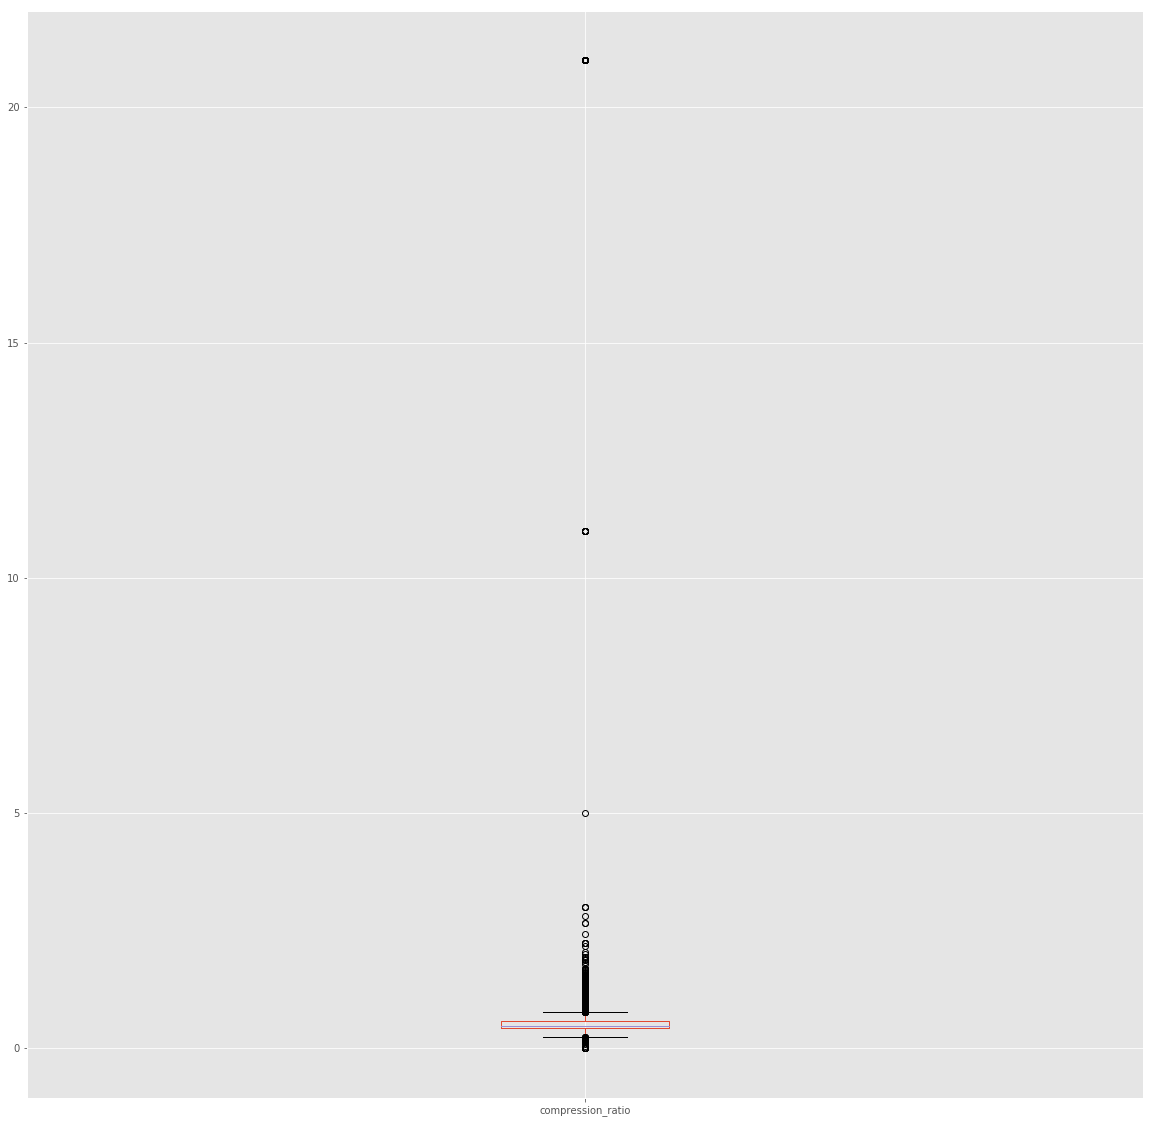

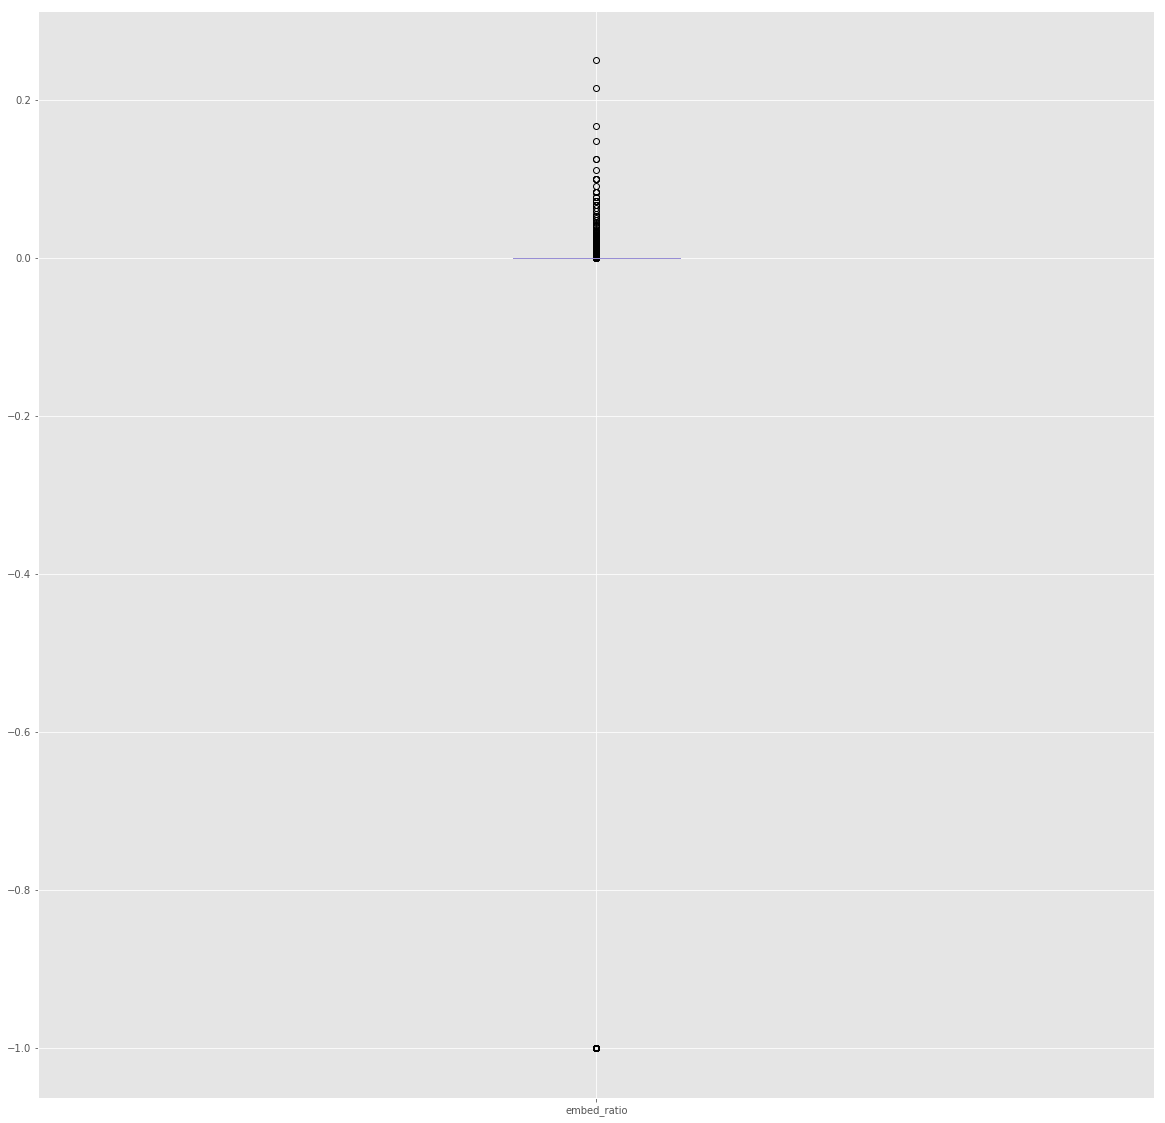

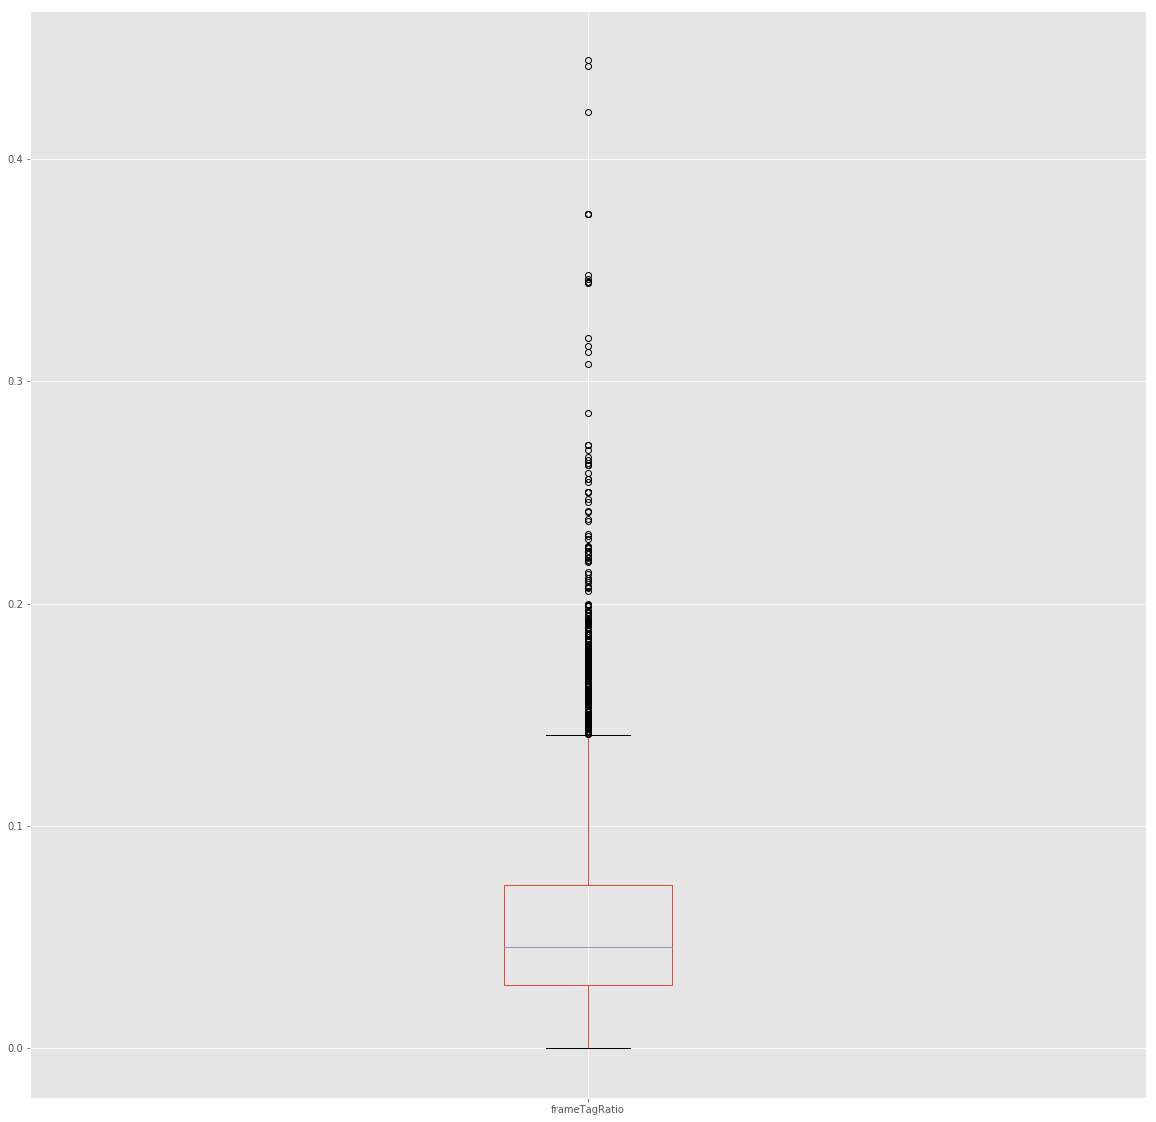

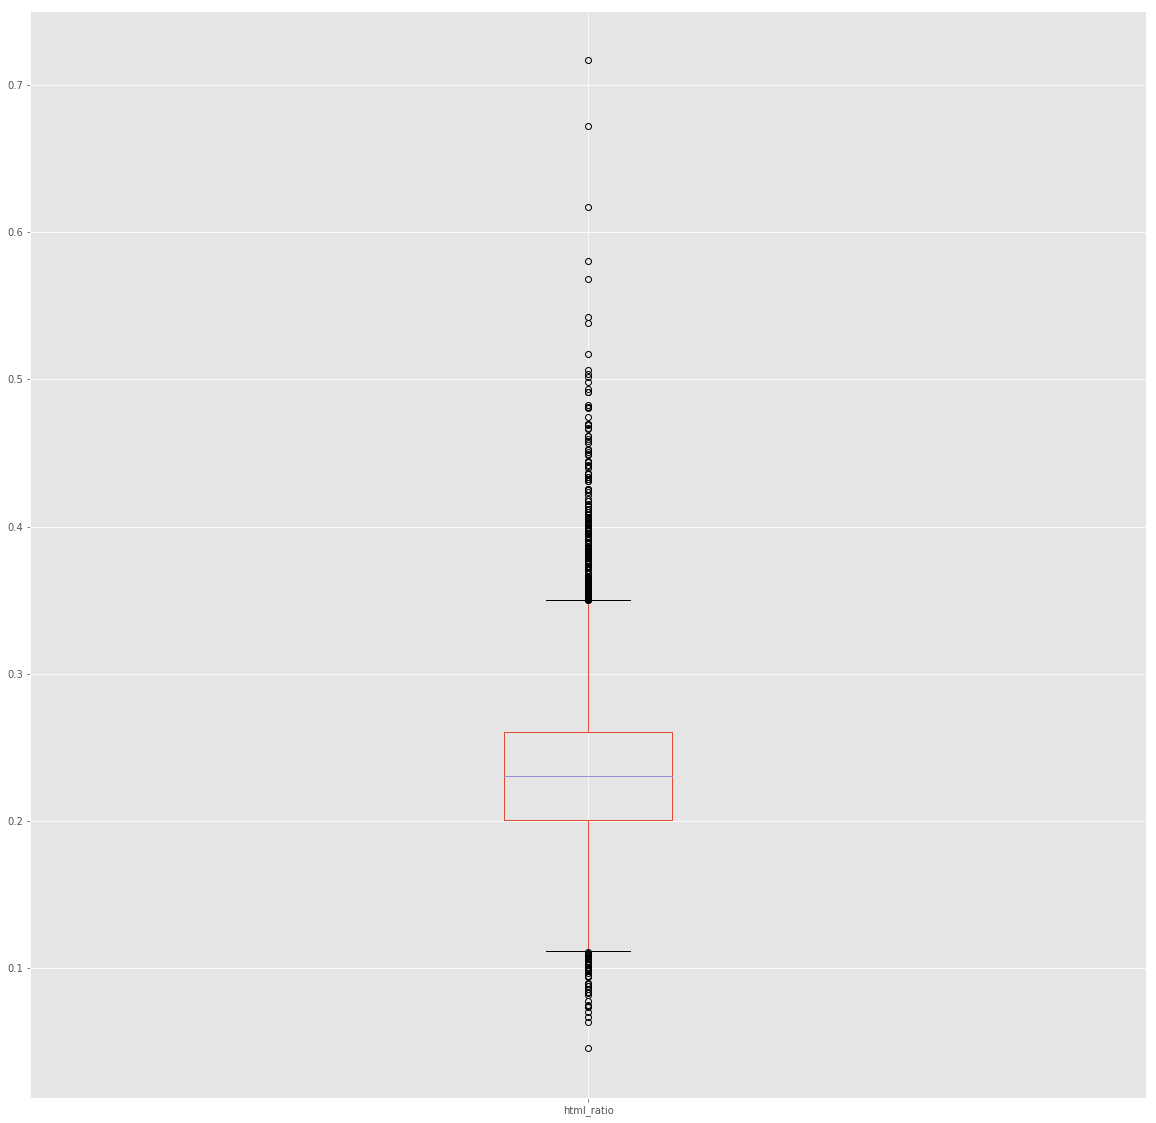

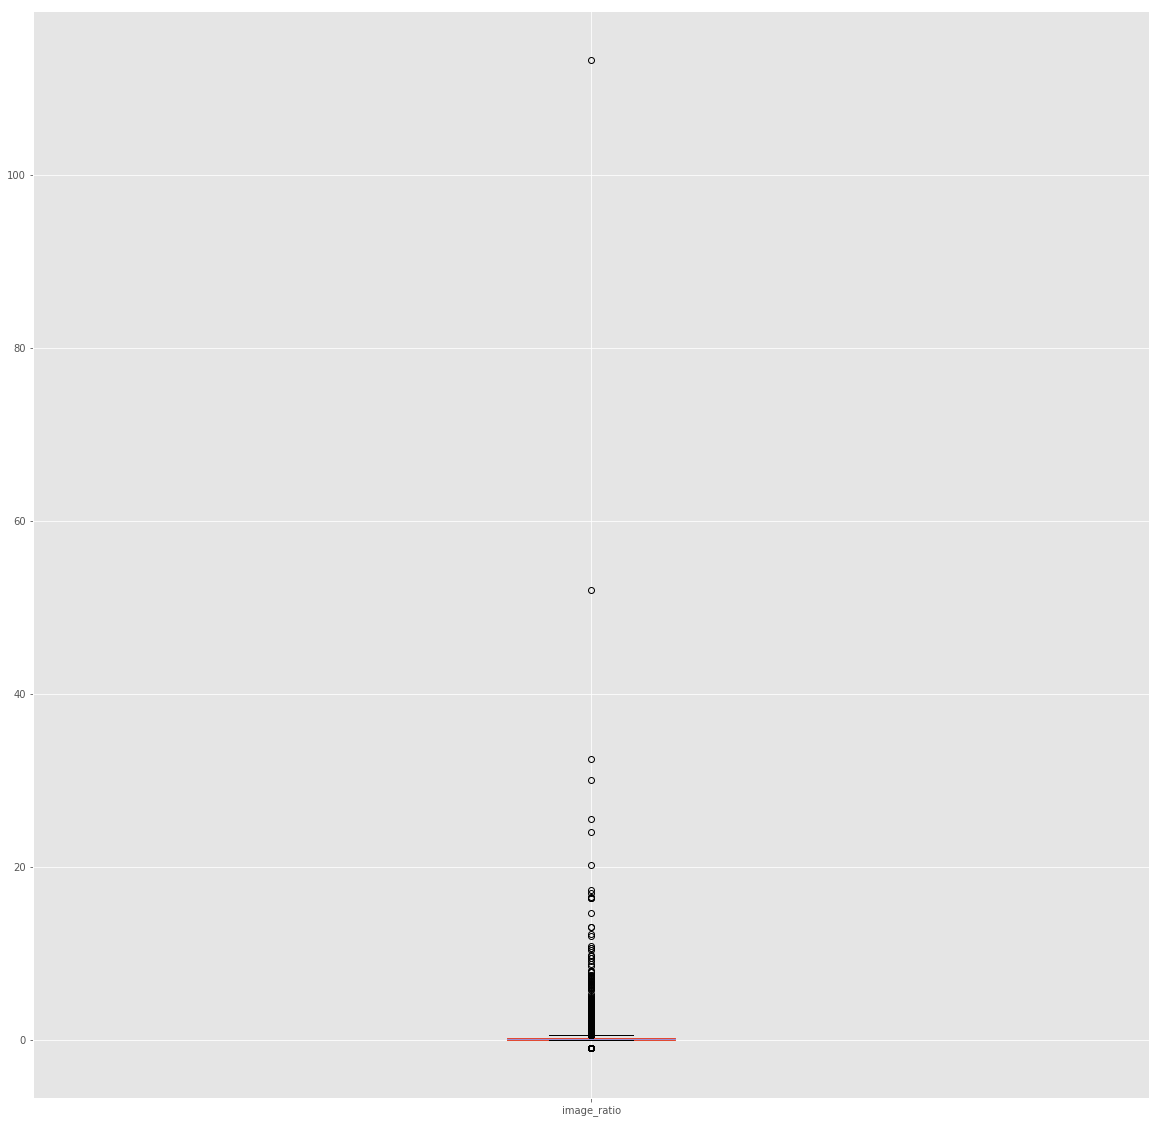

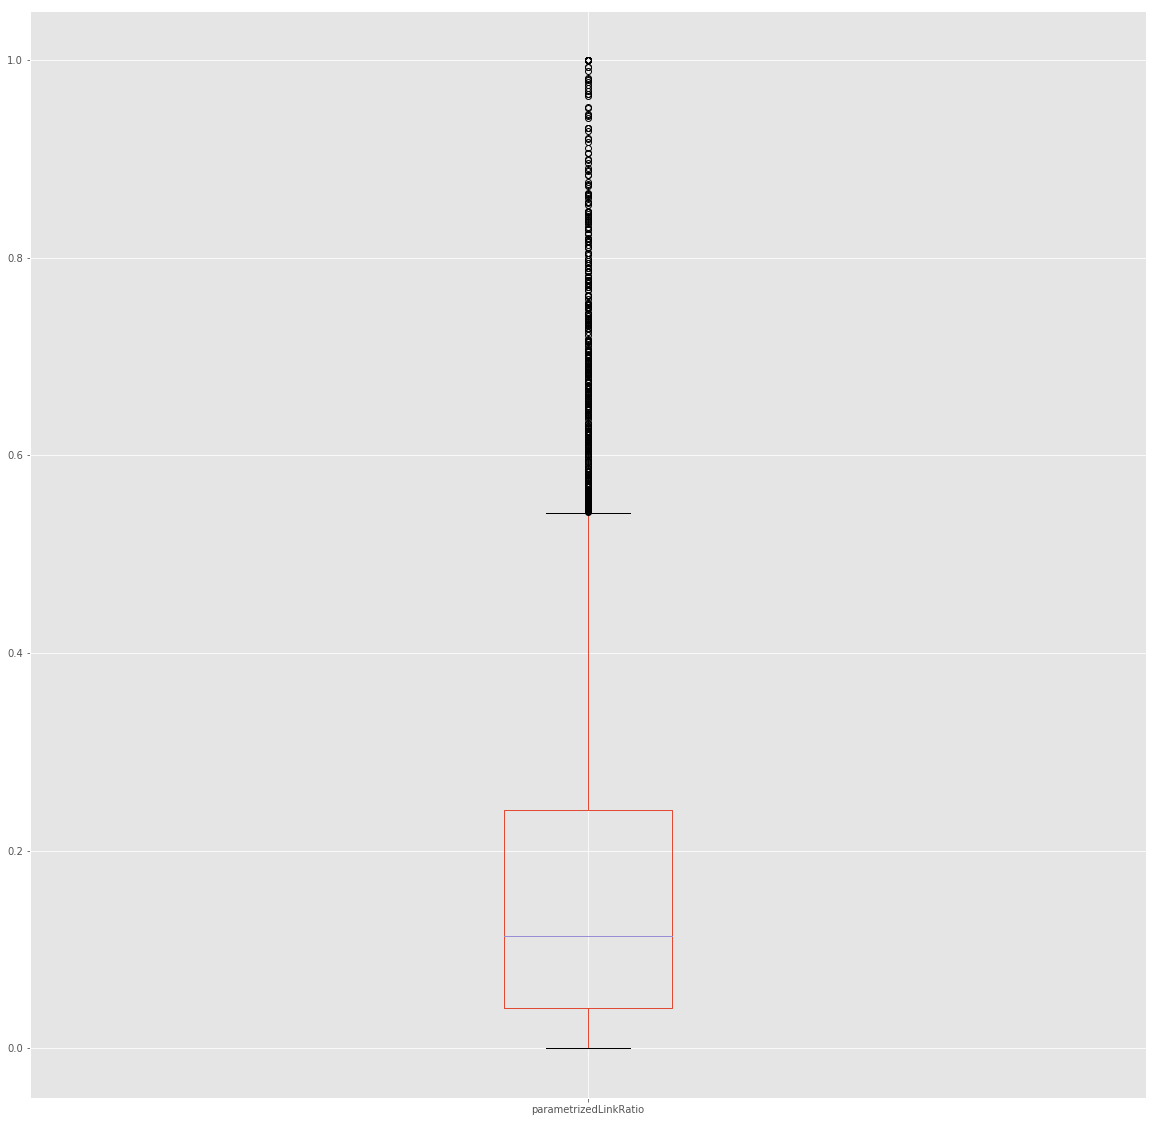

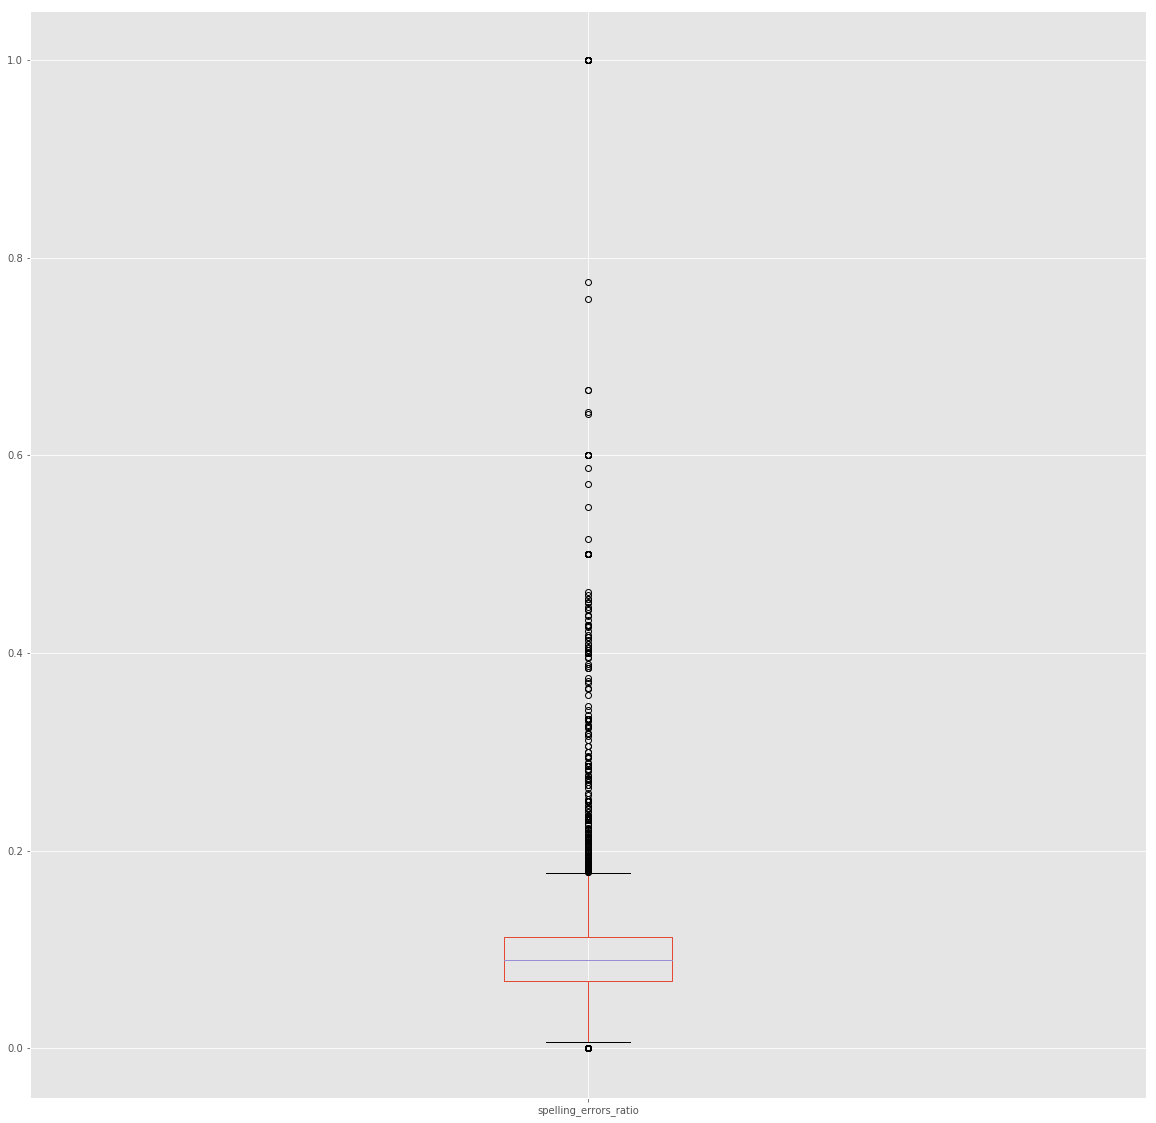

In [63]:
for attr in [
        'compression_ratio',
        'embed_ratio',
        'frameTagRatio',
        'html_ratio',
        'image_ratio',
        'parametrizedLinkRatio',
        'spelling_errors_ratio'
    ]:
    print('\n\n### ' + attr + ' ###')
    print(TRAIN_DF[attr].head(5))
    print('\nStats:\n' + str(pandas.to_numeric(TRAIN_DF[attr], errors='coerce').describe()))
    plt.figure()
    TRAIN_DF[attr].plot.box(figsize=(20,20))

#### Embed Ratio
Počet použitých &lt;embed&gt; elementov na stránke. Atribút dosahuje hodnoty z intervalu <-1,0.25> s priemernou hodnotou -0.104. Prvý a tretí kvartil majú hodnotu 0, čo naznačuje dominanciu nulových hodnôt.


In [38]:
print(TRAIN_DF['embed_ratio'].describe())
print(TRAIN_DF['embed_ratio'].value_counts())

count    7395.000000
mean       -0.103750
std         0.306545
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.250000
Name: embed_ratio, dtype: float64
 0.000000    6138
-1.000000     774
 0.027778       6
 0.028571       6
 0.011364       5
 0.071429       4
 0.027027       4
 0.009615       4
 0.032258       4
 0.100000       4
 0.019608       4
 0.083333       4
 0.003367       3
 0.018182       3
 0.009901       3
 0.018519       3
 0.004587       3
 0.010000       3
 0.011494       3
 0.066667       3
 0.008475       3
 0.005076       3
 0.006579       3
 0.010309       3
 0.006711       3
 0.016949       3
 0.007407       3
 0.001522       3
 0.001931       3
 0.040000       3
             ... 
 0.013514       1
 0.000610       1
 0.001053       1
 0.001969       1
 0.003534       1
 0.001068       1
 0.008929       1
 0.002222       1
 0.005714       1
 0.006289       1
 0.002959       1
 0.002541       1
 0.020000       1
 0.024

### Binárne nominálne hodnoty
*Typ atribútov:* nominálne, binárne  
Táto skupina atribútov nadobúda hodnoty 0 a 1.

#### Frame Based
Stránka nemá &lt;body&gt; element, ale má &lt;frameset&gt;.

#### Has Domain Link
Stránka obsahuje odkazy s doménou.

#### Lengthy Link Domain
Stránka obsahuje aspoň tri odkazy s minimálne 30 alfanumerických znakov.

#### Label
Stránka je evergreen. Tento atribút je dostupný iba pre trénovacie dáta.

#### Is News
Stránka je klasifikovaná ako novinová.

#### News Front Page
Stránka je klasifikovaná ako titulná stránka novín.

In [64]:
print(TRAIN_DF[[
    'framebased',
    'hasDomainLink',
    'lengthyLinkDomain',
    'label'
    ]].describe())

for attr in ['is_news', 'news_front_page']:
    print('\n\n### ' + attr + ' ###')
    print(TRAIN_DF[attr].head(5))
    print('\nStats:\n' + str(pandas.to_numeric(TRAIN_DF[attr], errors='coerce').describe()))

    if attr == 'news_front_page':
        counts = TRAIN_DF[attr].value_counts()
        count = TRAIN_DF[attr].count()
        print('\nMissing value percentage\n' + str(counts['?']/count * 100))

       framebased  hasDomainLink  lengthyLinkDomain        label
count      7395.0    7395.000000        7395.000000  7395.000000
mean          0.0       0.021231           0.660311     0.513320
std           0.0       0.144162           0.473636     0.499856
min           0.0       0.000000           0.000000     0.000000
25%           0.0       0.000000           0.000000     0.000000
50%           0.0       0.000000           1.000000     1.000000
75%           0.0       0.000000           1.000000     1.000000
max           0.0       1.000000           1.000000     1.000000


### is_news ###
0    1
1    1
2    1
3    1
4    1
Name: is_news, dtype: int64

Stats:
count    7395.000000
mean        0.615551
std         0.486498
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_news, dtype: float64


### news_front_page ###
0    0
1    0
2    0
3    0
4    0
Name: news_front_page, dtype: object

Stats:
count    6147.000000
m

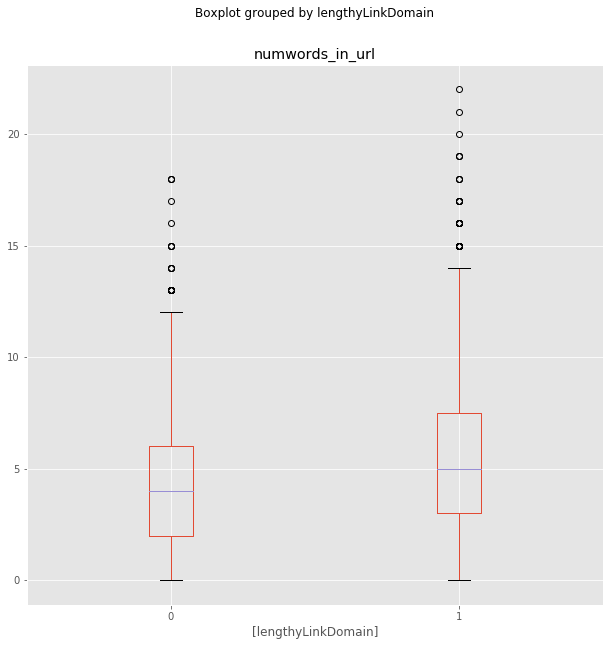

In [85]:
TRAIN_DF[['lengthyLinkDomain', 'numwords_in_url']].boxplot(by='lengthyLinkDomain', figsize=(10, 10))

### Link Word Score
*Typ atribútu:* numerický, pomerový  
Percento textu, ktorý je súčasťou odkazu.

In [31]:
print(TRAIN_DF['linkwordscore'].head(5))
print('\nStats:\n' + str(TRAIN_DF['linkwordscore'].describe()))

0    24
1    40
2    55
3    24
4    14
Name: linkwordscore, dtype: int64

Stats:
count    7395.000000
mean       30.077079
std        20.393101
min         0.000000
25%        14.000000
50%        25.000000
75%        43.000000
max       100.000000
Name: linkwordscore, dtype: float64


### Non Markup Alphanum Characters
*Typ atribútu:* numerický, celočíselný  
Počet alfanumerických znakov čistého textu.

In [32]:
print(TRAIN_DF['non_markup_alphanum_characters'].head(5))
print('\nStats:\n' + str(TRAIN_DF['non_markup_alphanum_characters'].describe()))

0     5424
1     4973
2     2240
3     2737
4    12032
Name: non_markup_alphanum_characters, dtype: int64

Stats:
count      7395.000000
mean       5716.598242
std        8875.432430
min           0.000000
25%        1579.000000
50%        3500.000000
75%        6377.000000
max      207952.000000
Name: non_markup_alphanum_characters, dtype: float64


### Number of Links
*Typ atribútu:* numerický, celočíselný  
Atribút vyjadruje počet odkazov na stránke.

In [35]:
print(TRAIN_DF['numberOfLinks'].head(5))
print('\nStats:\n' + str(TRAIN_DF['numberOfLinks'].describe()))

print(TRAIN_DF['numwords_in_url'].head(5))
print('\nStats:\n' + str(TRAIN_DF['numwords_in_url'].describe()))

0    170
1    187
2    258
3    120
4    162
Name: numberOfLinks, dtype: int64

Stats:
count    7395.000000
mean      178.754564
std       179.466198
min         1.000000
25%        82.000000
50%       139.000000
75%       222.000000
max      4997.000000
Name: numberOfLinks, dtype: float64
0     8
1     9
2    11
3     5
4    10
Name: numwords_in_url, dtype: int64

Stats:
count    7395.000000
mean        4.960649
std         3.233111
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        22.000000
Name: numwords_in_url, dtype: float64


In [9]:
%matplotlib inline
import matplotlib as plt
matplotlib.style.use('ggplot')

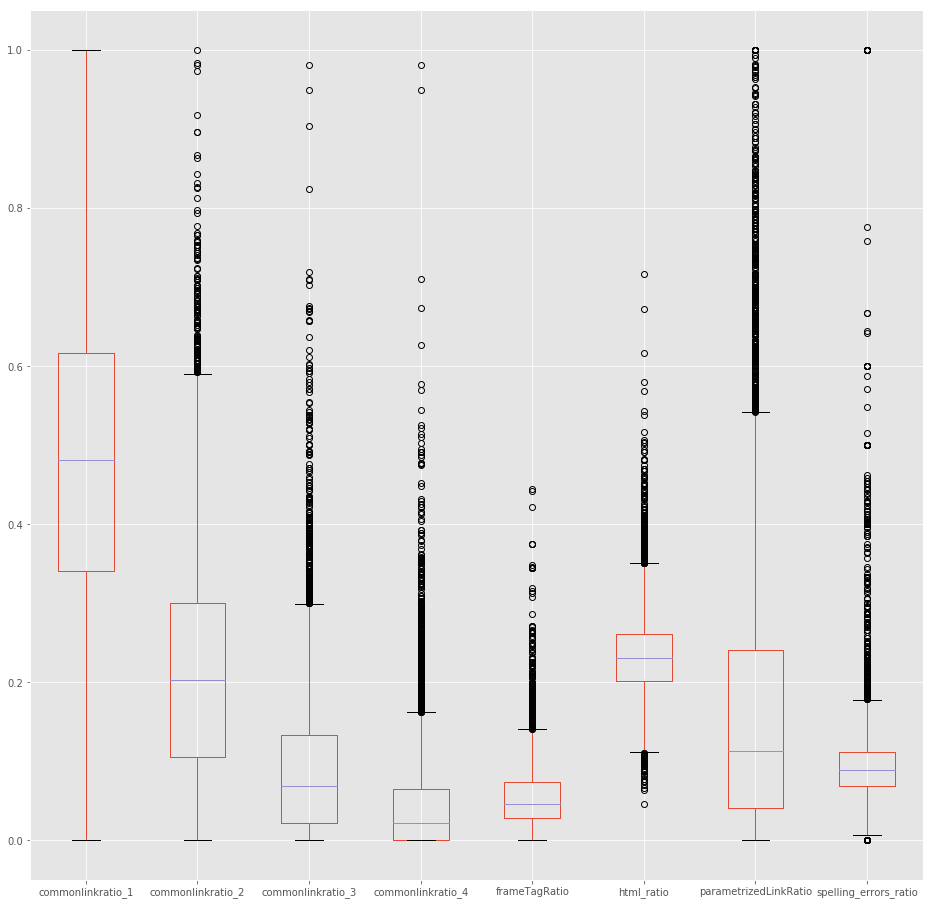

In [17]:
plt.figure()
TRAIN_DF[[
    'commonlinkratio_1',
    'commonlinkratio_2',
    'commonlinkratio_3',
    'commonlinkratio_4',
#    'embed_ratio',
    'frameTagRatio',
    'html_ratio',
#    'image_ratio',
    'parametrizedLinkRatio',
    'spelling_errors_ratio'
]].plot.box(figsize=(16, 16))

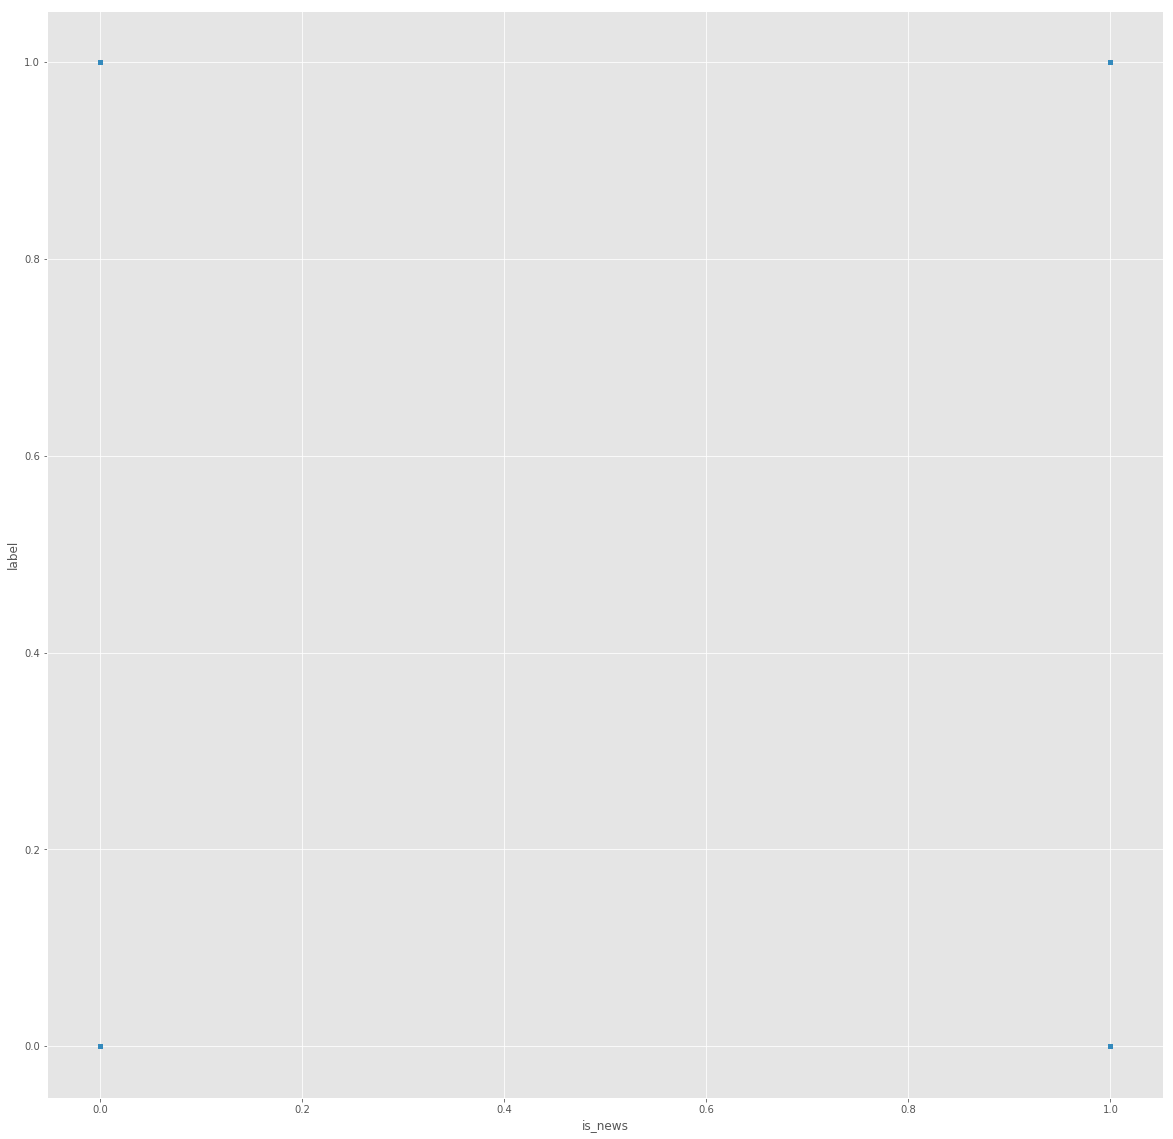

In [52]:
plt.figure()
TRAIN_DF.loc[TRAIN_DF['is_news'] == '?', 'is_news'] = 0
TRAIN_DF['is_news'] = pandas.to_numeric(TRAIN_DF['is_news'])
TRAIN_DF[[
    'is_news',
    'label'
]].plot.scatter(x='is_news', y='label', figsize=(20, 20))


In [46]:
pandas.set_option('display.max_columns', None)
TRAIN_DF.corr()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
urlid,1.000000,-0.011162,0.002856,0.008407,0.005285,0.009573,-0.007343,0.013340,NaN,0.010065,-0.005802,0.016989,-0.000590,-0.007780,-0.013668,0.016732,-0.002019,-0.017342,-0.005868,0.002292,0.013450
avglinksize,-0.011162,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,NaN,-0.049270,-0.002046,0.018974,-0.003002,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.002856,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,NaN,-0.294860,0.006790,-0.201501,-0.064435,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.008407,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,NaN,-0.259222,0.000263,-0.159702,-0.044663,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.005285,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,NaN,-0.218559,-0.031097,-0.133370,-0.050357,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.009573,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,NaN,-0.178064,-0.052519,-0.136561,-0.038071,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.007343,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,NaN,0.159335,0.027657,0.106335,-0.188976,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.013340,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,NaN,-0.130753,-0.026473,-0.090938,0.183808,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
framebased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frameTagRatio,0.010065,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,NaN,1.000000,0.010193,0.384937,-0.088847,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762


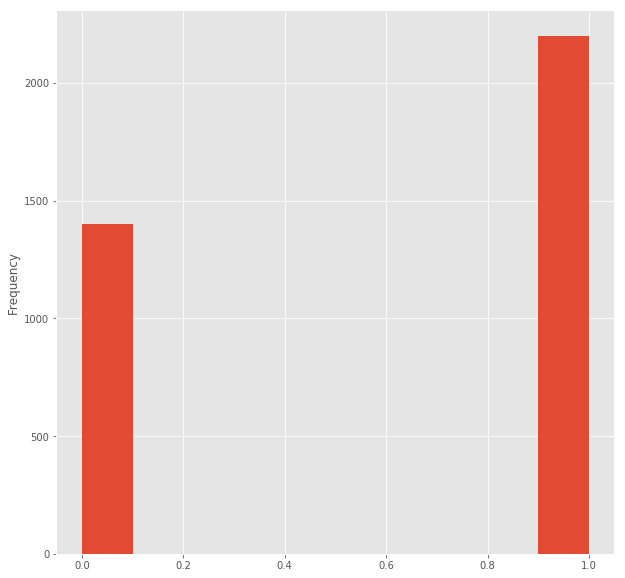

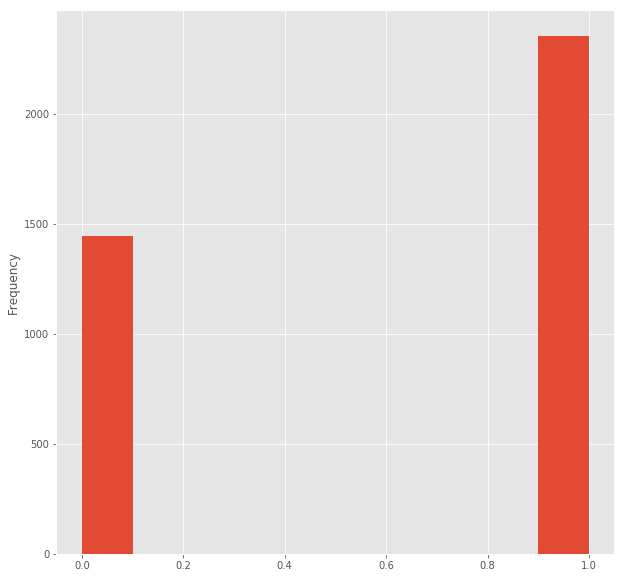

In [105]:
#TRAIN_DF[['label', 'is_news']].plot.hist(alpha=0.5, figsize=(10, 10))
TRAIN_DF.loc[TRAIN_DF['label'] == 0]['is_news'].plot.hist(figsize=(10, 10))
plt.figure()
TRAIN_DF.loc[TRAIN_DF['label'] == 1]['is_news'].plot.hist(figsize=(10, 10))

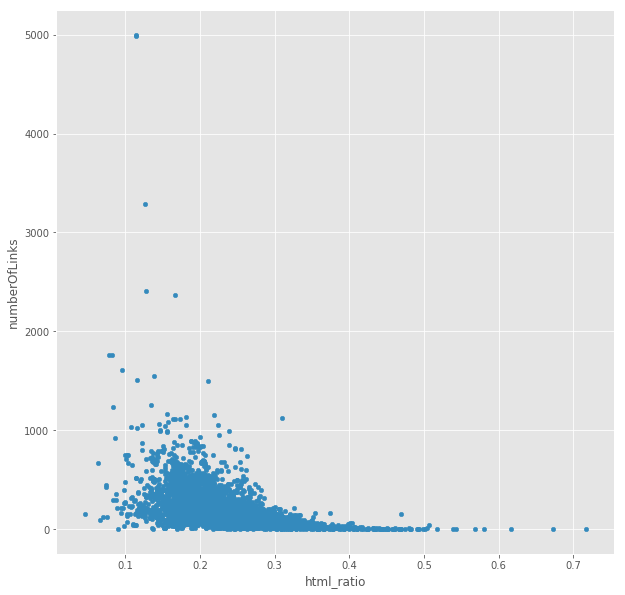

In [94]:
TRAIN_DF[['html_ratio', 'numberOfLinks']].plot.scatter(x='html_ratio', y='numberOfLinks', figsize=(10, 10))